# Programming Exercise 3: Multi-class Classification and Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
from scipy.special import expit #Vectorized sigmoid function
from PIL import Image
from scipy import optimize

## Visualizing the data

In [2]:
data = scipy.io.loadmat('data/ex3data1.mat')
X, y = data['X'], data['y']
print('X.shape: ', X.shape)
print('y.shape: ', y.shape)

X.shape:  (5000, 400)
y.shape:  (5000, 1)


In [3]:
def transformData(line, imgWith=20, imgHeight=20):
    pixel = line.reshape(imgWith, imgHeight)
    return pixel.T

def displayData(imgX=X, rows=10, columns=10, pixelWith=20, pixelHeight=20):
    """展示mat数据图形"""
    displayPic = np.zeros([rows*pixelHeight, columns*pixelWith])
    imageIdx = random.sample(range(imgX.shape[0]), rows*columns)
    for row in range(rows):
        for column in range(columns):
            idx = imageIdx[row*columns+column]
            displayPic[row*pixelWith:(row+1)*pixelWith, column*pixelHeight:(column+1)*pixelHeight] = \
            transformData(imgX[idx])
    
    plt.figure(figsize = (5, 5))
    plt.imshow(displayPic, cmap=cm.Greys_r)

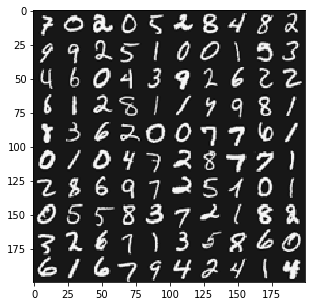

In [4]:
displayData()

## One-vs-all Classification

In [5]:
X = np.insert(X, 0, 1, axis=1)
initial_theta = np.zeros([X.shape[1], 1])

def h(theta, X):
    return expit(np.dot(X, theta))

def costFunction(theta, *args):
    X, y, lamb = args
    m = X.shape[0]
    h_y = h(theta, X) - y
    theta_1 = theta[1:]
    cost = -1./m * np.sum(np.dot(y.T, np.log(h(theta, X))) + np.dot((1-y).T, np.log(1-h(theta, X)))) + lamb/(2*m) * np.sum(np.dot(theta_1.T, theta_1))
    return cost
    
def costGradient(theta, *args):
    X, y, lamb = args
    m = X.shape[0]
    h_y = h(theta, X) - y
    theta_1 = theta[1:]
    grad = 1./m * np.dot(X.T, h_y)
    grad[1:] += lamb/m * theta_1
    return grad.T

def optimizeTheta(theta, X, y, lamb=0.):
    result = optimize.fmin_cg(costFunction, x0=theta, fprime=costGradient, args=(X, y, lamb), maxiter=50, disp=False, full_output=True)
    return result[0], result[1]

def buildTheta(X, y, lamb=0.):
    classes = len(np.unique(y).reshape(-1))
    initial_theta = np.zeros((X.shape[1], 1))
    theta = np.zeros([classes, X.shape[1]])
    for i in range(classes):
        iclass = i if i else 10 #class "10" corresponds to handwritten zero
        print('Optimizing for handwritten number %d...' % i)
        logic_y = np.array([1 if x == iclass else 0 for x in y])#.reshape((X.shape[0],1))
        itheta, imincost = optimizeTheta(initial_theta, X, logic_y, lamb)
        theta[i, :] = itheta
    print("Done!")
    return theta

In [ ]:
optimize_theta = buildTheta(X, y, 0)

Optimizing for handwritten number 0...


In [ ]:
def predictOneVsAll(theta, x, y):
    """
    Function that computes a hypothesis for an individual image (row in X)
    and returns the predicted integer corresponding to the handwritten image
    """
    classes = np.unique(y)
    classes = np.where(classes==10, 0, classes)
    classes = np.sort(classes)
    predict_vals = np.zeros([len(classes), 1])
    for i in classes:
        predict_vals[i] = h(theta[i], x)
    return classes[np.argmax(np.array(predict_vals))]

In [ ]:
n_correct, n_total = 0., 0.
incorrect_idx = []
for irow in range(X.shape[0]):
    n_total += 1
    real_y = 0 if y[irow]==10 else y[irow]
    if predictOneVsAll(optimize_theta, X[irow], y) == real_y: 
        n_correct += 1
    else: 
        incorrect_idx.append(irow)
print('Training set accuracy: %0.1f%%' % (100*(n_correct/n_total)))

In [ ]:
classes = np.unique(y)
classes = np.where(classes==10, 0, classes)
classes = np.sort(classes)
classes

In [ ]:
predict_vals = np.zeros([len(classes), 1])
for i in classes:
    predict_vals[i] = h(optimize_theta[i], X[4688])
classes[np.argmax(np.array(predict_vals))]